Create two random data sets with two features and two classes

Dependencies

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Consider that you are given a car height and you have the class label as 1 if cost of car is greater than 550 and 0 if it is less than or equal to 550.

In [35]:
df = pd.read_csv('/content/Data (3).csv')
data = df.to_numpy()
data.shape

(27, 2)

# Create the labels from the data

In [36]:
label = []
x_c1 = []
x_c2 = []
c1_count = 0
c2_count = 0
for i in range(data.shape[0]):
  if(data[i][1] > 550):
    label.append(1)
    x_c1.append(data[i][0])
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(data[i][0])
    c2_count += 1
print(x_c1)
print(x_c2)

[3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.5, 2.5, 1.5, 1.5, 3.0, 1.5, 1.0, 2.5, 1.0, 1.5, 1.0]
[1.0, 5.0, 3.0, 2.5]


In [37]:
c1_count

23

In [38]:
c2_count

4

# Plotting the distribution of samples.

[1.  3.  4.  3.  5.  2.  3.  3.  2.  1.  3.  2.  2.  1.  1.5 3.  2.5 1.5
 1.5 3.  1.5 1.  2.5 2.5 1.  1.5 1. ]


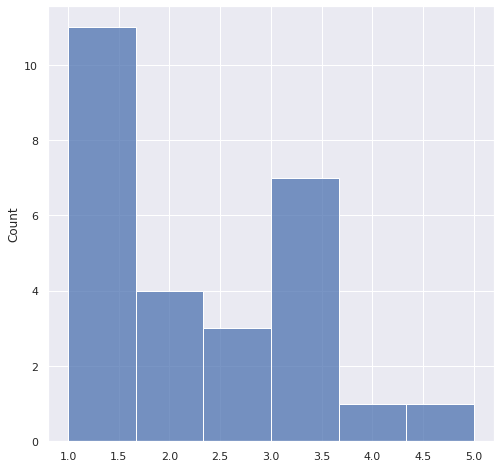

In [39]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
x = data[:,0]
print(x)
sns.histplot(x)
#Not a preferred way to plot distribution
# number of cars corresponding to each height

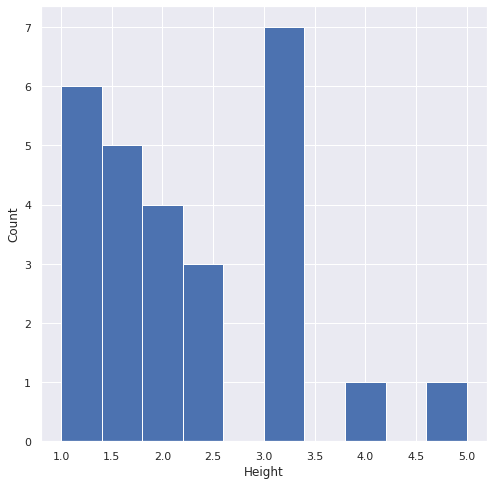

In [40]:
#This gives a clear idea
plt.hist(x)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

# Prior Probabilities for both the classes

In [41]:
no_of_samples = len(data)
prob_c1 = c1_count/no_of_samples
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


# Unique Values

In [42]:
print(x_c1)
print(x_c2)

[3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.5, 2.5, 1.5, 1.5, 3.0, 1.5, 1.0, 2.5, 1.0, 1.5, 1.0]
[1.0, 5.0, 3.0, 2.5]


In [43]:
from collections import Counter
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 

Plot the count of each unique element of the feature

In [44]:
unique_c1

dict_keys([3.0, 4.0, 2.0, 1.0, 1.5, 2.5])

In [45]:
count_unique_c1

[6, 1, 4, 5, 5, 2]

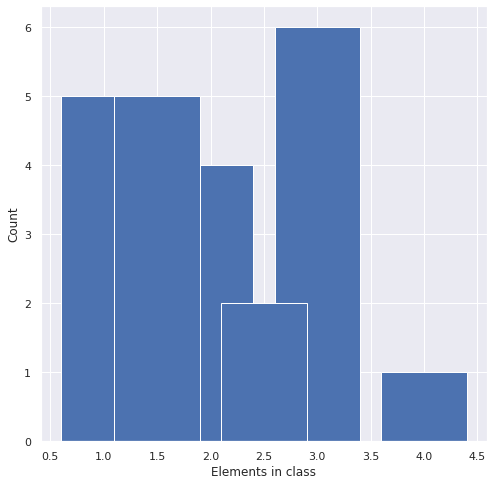

In [46]:
#Not a preferred way to plot distribution
plt.bar(unique_c1,count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

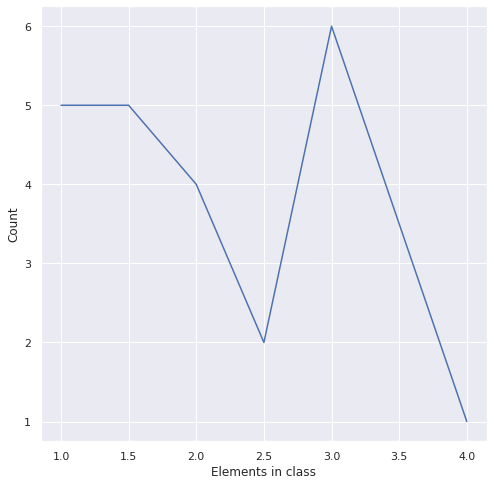

In [47]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

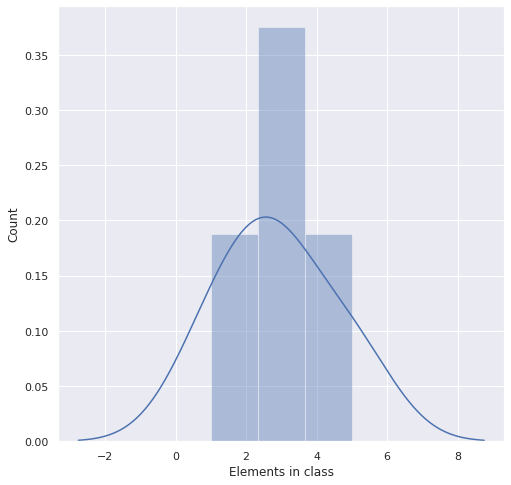

In [48]:
#Probability distribution of x_c2
sns.distplot(x_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

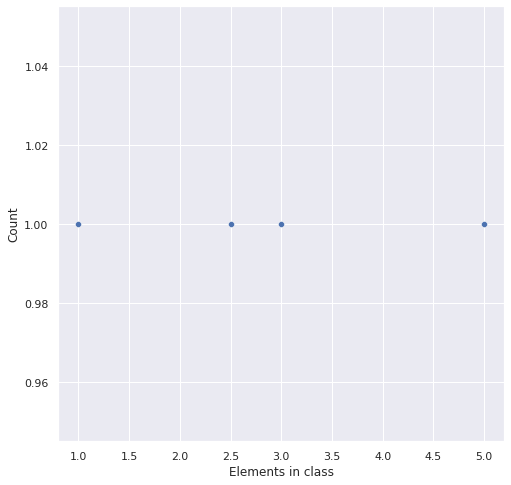

In [49]:
#Plot for the unique values in class c2
sns.scatterplot(list(unique_c2),count_unique_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

# Likelihood

Plot P(x|C1) and P(x|C2)

[6, 1, 4, 5, 5, 2]
[3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.5, 2.5, 1.5, 1.5, 3.0, 1.5, 1.0, 2.5, 1.0, 1.5, 1.0]
[0.26086957 0.04347826 0.17391304 0.2173913  0.2173913  0.08695652]
[1, 1, 1, 1]
[1.0, 5.0, 3.0, 2.5]
[0.25 0.25 0.25 0.25]


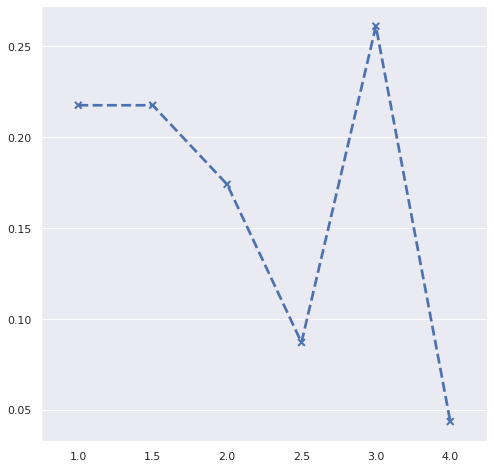

In [50]:
#sns.color_palette("Paired", 9)
print(count_unique_c1)
print(x_c1)
y1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
print(y1)
print(count_unique_c2)
print(x_c2)
y2 = np.array(count_unique_c2)/len(x_c2)
print(y2)


# Posterior Probability

In [51]:
df.head()

,Height,Price
0,1.0,550
1,3.0,566
2,4.0,558
3,3.0,784
4,5.0,333


In [52]:
unique_heights = df["Height"].unique()
counts = df["Height"].value_counts()
print(unique_heights)
print(counts)


[1.  3.  4.  5.  2.  1.5 2.5]
3.0    7
1.0    6
1.5    5
2.0    4
2.5    3
5.0    1
4.0    1
Name: Height, dtype: int64


In [53]:
likelihood_c1 = y1
likelihood_c2 = y2
prob_c1
prob_c2

0.14814814814814814

In [54]:
print(likelihood_c1)
print(likelihood_c2)
print(prob_c1)
print(prob_c2)

[0.26086957 0.04347826 0.17391304 0.2173913  0.2173913  0.08695652]
[0.25 0.25 0.25 0.25]
0.8518518518518519
0.14814814814814814


In [55]:
print(unique_c1)
print(unique_c2)

dict_keys([3.0, 4.0, 2.0, 1.0, 1.5, 2.5])
dict_keys([1.0, 5.0, 3.0, 2.5])


In [56]:
posterior_c1 = []
i=0
for height in unique_c1:
  posterior_c1.append((likelihood_c1[i]* prob_c1)/ ( counts[height] /df.shape[0]))
  i= i+1

# for better understanding
dict_posterior_c1 = {}
i = 0
for height in unique_c1:
  dict_posterior_c1[height] = posterior_c1[i]
  i +=1

dict_posterior_c1

{1.0: 0.8333333333333334,
 1.5: 1.0,
 2.0: 1.0,
 2.5: 0.6666666666666666,
 3.0: 0.8571428571428571,
 4.0: 1.0}

In [57]:
posterior_c2 = []
i=0
for height in unique_c2:
  posterior_c2.append((likelihood_c2[i]* prob_c2)/ ( counts[height] /df.shape[0]))
  i= i+1

# for better understanding
dict_posterior_c2 = {}
i = 0
for height in unique_c2:
  dict_posterior_c2[height] = posterior_c2[i]
  i +=1

dict_posterior_c2


{1.0: 0.16666666666666666,
 2.5: 0.3333333333333333,
 3.0: 0.14285714285714285,
 5.0: 1.0}

Plot P(C1|x) and P(C2|x)

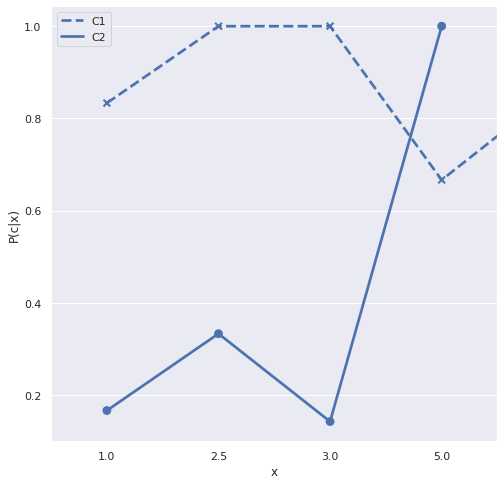

In [58]:
sns.pointplot(list(unique_c1), posterior_c1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2), posterior_c2,linestyles='-',markers=['o'])
plt.xlabel("x")
plt.ylabel("P(c|x)")
plt.legend(labels = ['C1','C2'])
plt.show()

# Dataset 2

Read dataset. c1 contains two features of class 1 and c2 contains the two features for class 2. 

In [59]:
df_c1 = pd.read_csv('/content/c1.csv')
df_c2 = pd.read_csv('/content/c2.csv')
class1_train = df_c1.to_numpy()
class2_train = df_c2.to_numpy()

In [60]:
df_c1.shape

(160, 2)

In [61]:
df_c1.head()

,x1,x2
0,0.320478,0.481092
1,0.050691,0.096400
2,3.748470,0.403931
3,2.256374,2.089962
4,1.421454,1.243629


In [62]:
df_c2.shape

(39, 2)

In [63]:
df_c2.head()

,x1,x2
0,-0.779019,1.163869
1,-1.345146,-2.323707
2,-0.528361,-1.594005
3,-0.904174,-1.306116
4,-1.019487,-1.336907


Print the data

# Create the labels from the given data.

In [64]:
# class1_train gives the features corresponding to class1
# class2_train gices the features corresponding to class2
print(class1_train.shape)
print(class1_train)
print(type(class2_train))
print(class2_train.shape)
print(type(class1_train))
print(class2_train)

(160, 2)
[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.150590

# Plotting the distribution of samples.

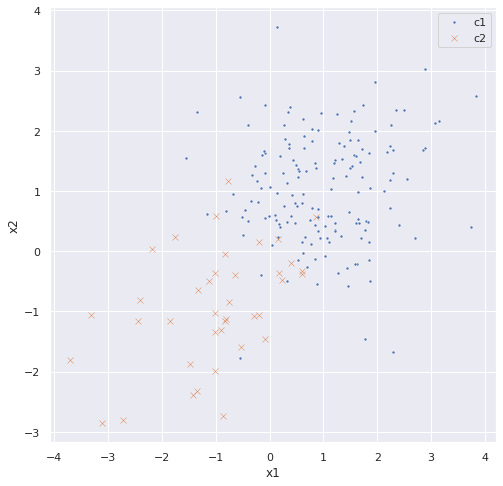

In [65]:
import seaborn as sns
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='.')
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='x')
plt.xlabel("x1")
plt.ylabel('x2')
plt.legend(['c1','c2'])
plt.show()


# Determine Prior Probabilities

In [66]:
no_of_samples = len(class1_train)+len(class2_train)

In [67]:
prob_c1 = len(class1_train)/no_of_samples
prob_c1

0.8040201005025126

In [68]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.19597989949748743

Plotting the prior

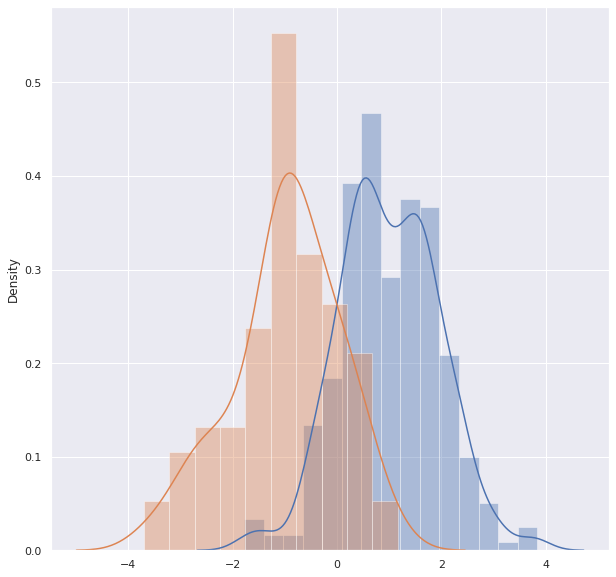

In [69]:
#Requires proper labelling
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class1_train,label='C1')
sns.distplot(class2_train)
plt.show()

# Plot the data distribution and the histogram of feature 1 and feature 2 in the x axis and the y -axis respectively. The distribution of feature 1 wil be along the top of the x-axis and feature 2 along the right of the y axis.

In [70]:
df_c1_class = df_c1
df_c1_class["class"]= 'c1'
df_c2_class = df_c2
df_c2_class["class"]= 'c2'
df_c2_class.head()

,x1,x2,class
0,-0.779019,1.163869,c2
1,-1.345146,-2.323707,c2
2,-0.528361,-1.594005,c2
3,-0.904174,-1.306116,c2
4,-1.019487,-1.336907,c2


In [71]:
# concatenating dataframes for each class
frames = [df_c1_class, df_c2_class]
result = pd.concat(frames)

In [72]:
result.head()

,x1,x2,class
0,0.320478,0.481092,c1
1,0.050691,0.096400,c1
2,3.748470,0.403931,c1
3,2.256374,2.089962,c1
4,1.421454,1.243629,c1


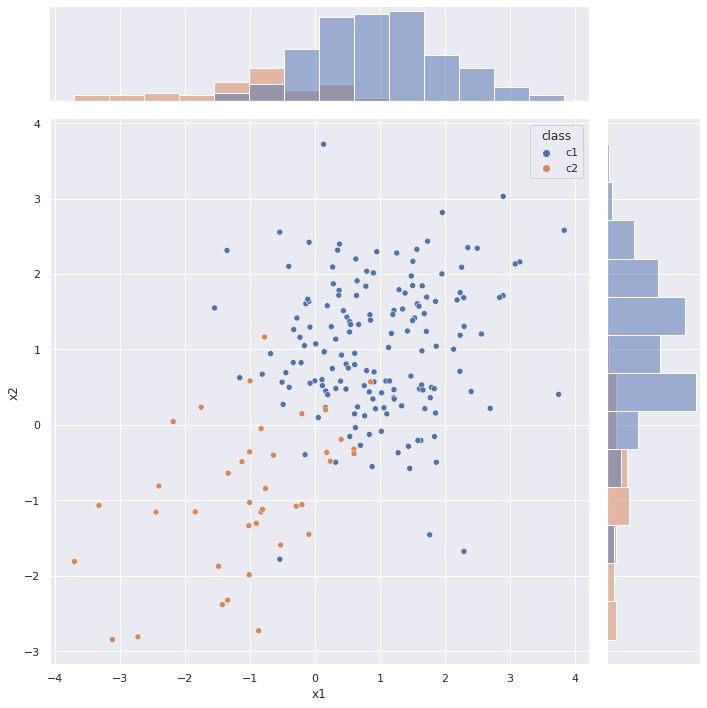

In [73]:
s = sns.JointGrid(data= result, x="x1", y="x2",  height=10, hue="class")
g = s.plot(sns.scatterplot, sns.histplot)

# Plot count of unique element for each class

In [74]:
df_c1_class.shape

(160, 3)

In [75]:
df_c2_class.shape

(39, 3)

In [76]:
result['class'].iloc[:159]= 1
result['class'].iloc[160:]= 2


In [77]:
bin_x1 = pd.cut(result["x1"],right=False,bins=8,labels=[1,2,3,4,5,6,7,8])
bin_x2 = pd.cut(result["x2"],right=False,bins=8,labels=[1,2,3,4,5,6,7,8])
result["x1_bins"]= bin_x1
result["x2_bins"] = bin_x2

In [78]:
result.head()

,x1,x2,class,x1_bins,x2_bins
0,0.320478,0.481092,1,5,5
1,0.050691,0.096400,1,4,4
2,3.748470,0.403931,1,8,4
3,2.256374,2.089962,1,7,7
4,1.421454,1.243629,1,6,5


In [79]:
class1_train11 = pd.DataFrame()
class2_train22 = pd.DataFrame()
class1_train11["x1"] = bin_x1.iloc[:160]
class1_train11["x2"] = bin_x2.iloc[:160]
class2_train22["x1"] = bin_x1.iloc[160:]
class2_train22["x2"] = bin_x2.iloc[160:]

In [80]:
class1_train11.shape

(160, 2)

In [81]:
class2_train22.shape

(39, 2)

In [82]:
class1_train1 = class1_train11.to_numpy()
class2_train2 = class2_train22.to_numpy()

In [83]:
class1_train1

array([[5, 5],
       [4, 4],
       [8, 4],
       [7, 7],
       [6, 5],
       [5, 5],
       [6, 5],
       [6, 6],
       [6, 7],
       [5, 4],
       [6, 4],
       [4, 4],
       [7, 7],
       [6, 4],
       [7, 5],
       [4, 5],
       [6, 4],
       [7, 7],
       [5, 4],
       [8, 6],
       [6, 6],
       [6, 4],
       [4, 7],
       [5, 5],
       [7, 6],
       [4, 3],
       [7, 5],
       [6, 6],
       [8, 7],
       [5, 4],
       [5, 7],
       [4, 6],
       [5, 5],
       [5, 6],
       [6, 5],
       [5, 6],
       [6, 7],
       [6, 6],
       [6, 6],
       [5, 8],
       [5, 6],
       [5, 4],
       [6, 5],
       [5, 5],
       [6, 4],
       [5, 6],
       [4, 2],
       [4, 5],
       [5, 5],
       [6, 6],
       [4, 5],
       [5, 5],
       [3, 7],
       [6, 5],
       [5, 5],
       [5, 6],
       [5, 7],
       [5, 6],
       [5, 6],
       [4, 6],
       [4, 7],
       [6, 3],
       [6, 4],
       [4, 6],
       [4, 6],
       [4, 5],
       [7,

In [84]:
class2_train2

array([[4, 5],
       [3, 1],
       [4, 2],
       [3, 2],
       [3, 2],
       [5, 4],
       [5, 4],
       [3, 4],
       [3, 3],
       [2, 3],
       [5, 3],
       [4, 3],
       [2, 3],
       [4, 4],
       [3, 1],
       [3, 4],
       [4, 2],
       [4, 3],
       [2, 3],
       [5, 4],
       [3, 3],
       [4, 4],
       [4, 3],
       [1, 3],
       [3, 2],
       [3, 5],
       [5, 5],
       [2, 1],
       [1, 2],
       [4, 3],
       [3, 2],
       [4, 3],
       [2, 4],
       [1, 1],
       [4, 3],
       [3, 3],
       [5, 4],
       [5, 4],
       [4, 1]], dtype=object)

In [85]:
result.head()

,x1,x2,class,x1_bins,x2_bins
0,0.320478,0.481092,1,5,5
1,0.050691,0.096400,1,4,4
2,3.748470,0.403931,1,8,4
3,2.256374,2.089962,1,7,7
4,1.421454,1.243629,1,6,5


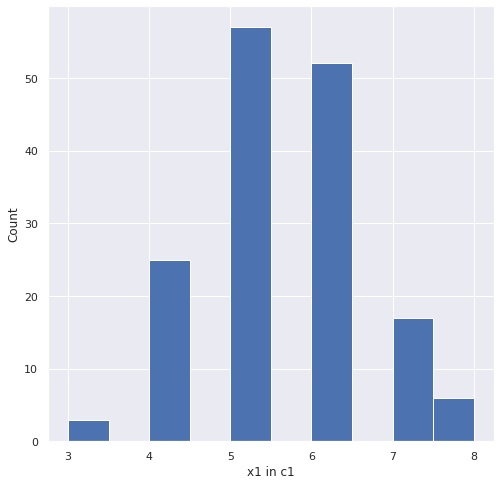

In [86]:
# now that the data is divided into bins , we can plot the count of elements belonging to each unique bin
plt.hist(class1_train1[:,0])
plt.xlabel("x1 in c1")
plt.ylabel("Count")
plt.show()

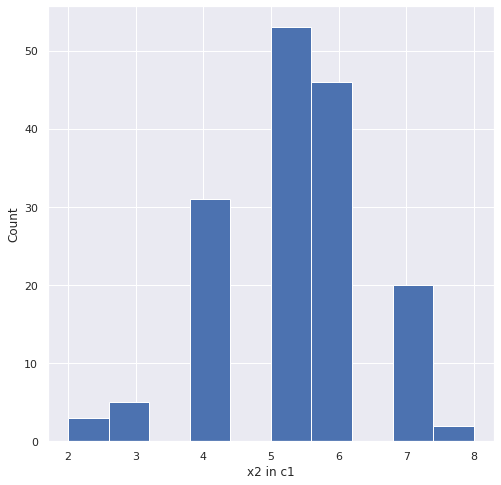

In [87]:
# x2 in c1
plt.hist(class1_train1[:,1])
plt.xlabel("x2 in c1")
plt.ylabel("Count")
plt.show()

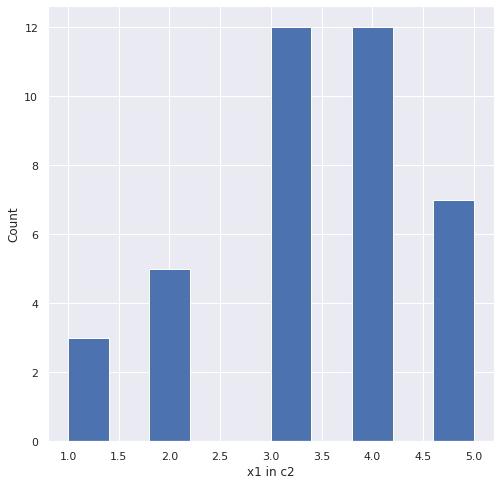

In [88]:
# x1 in c2
plt.hist(class2_train2[:,0])
plt.xlabel("x1 in c2")
plt.ylabel("Count")
plt.show()

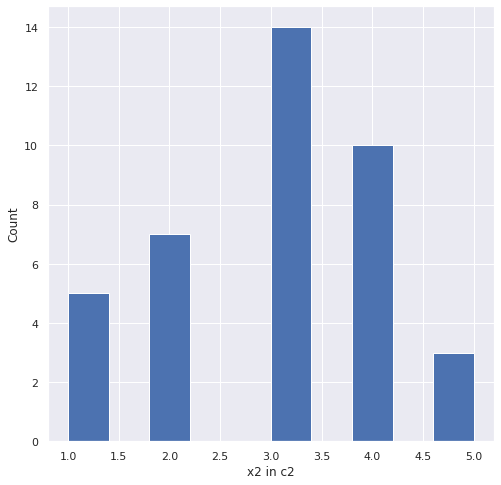

In [89]:
# x2 in c2
plt.hist(class2_train2[:,1])
plt.xlabel("x2 in c2")
plt.ylabel("Count")
plt.show()

# Plot the Posterior Probability for each class

In [90]:
from collections import Counter
x1_total = result['x1_bins']
unique_x1_total = Counter(x1_total).keys() 
count_unique_x1_total = list(Counter(x1_total).values())

x2_total = result['x2_bins']
unique_x2_total = Counter(x2_total).keys() 
count_unique_x2_total = list(Counter(x2_total).values()) 

x1_c1 = class1_train1[:,0]
unique_x1_c1 = Counter(x1_c1).keys() 
count_unique_x1_c1 = list(Counter(x1_c1).values()) 

x2_c1 = class1_train1[:,1]
unique_x2_c1 = Counter(x2_c1).keys() 
count_unique_x2_c1 = list(Counter(x2_c1).values()) 

x1_c2 = class2_train2[:,0]
unique_x1_c2 = Counter(x1_c2).keys() 
count_unique_x1_c2 = list(Counter(x1_c2).values())

x2_c2 = class2_train2[:,1]
unique_x2_c2 = Counter(x2_c2).keys() 
count_unique_x2_c2 = list(Counter(x2_c2).values())
# unique_c1 = Counter(x).keys() 
# count_unique_c1 = list(Counter(x).values()) 
# x = class2_train[:,0]
# unique_c2 = Counter(x).keys() 
# count_unique_c2 = list(Counter(x).values()) 

In [91]:

unique_x1_total

dict_keys([5, 4, 8, 7, 6, 3, 2, 1])

In [92]:
count_unique_x1_total

[64, 37, 6, 17, 52, 15, 5, 3]

In [93]:
unique_x2_total

dict_keys([5, 4, 7, 6, 3, 8, 2, 1])

In [94]:
count_unique_x2_total

[56, 41, 20, 46, 19, 2, 10, 5]

In [95]:
unique_x2_c1

dict_keys([5, 4, 7, 6, 3, 8, 2])

In [96]:
unique_x2_c2

dict_keys([5, 1, 2, 4, 3])

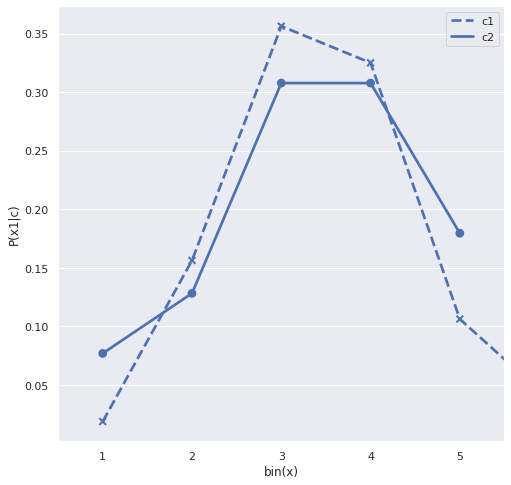

In [97]:
# plotting likelihood for x1 
y1_c1 = np.array(count_unique_x1_c1)/len(x1_c1)
sns.pointplot(list(unique_x1_c1),y1_c1, linestyles="--",markers =['x'] )
y1_c2 = np.array(count_unique_x1_c2)/len(x1_c2)
sns.pointplot(list(unique_x1_c2),y1_c2,linestyles='-',markers=['o'])
plt.legend(labels = ['c1','c2'])
plt.xlabel("bin(x)")
plt.ylabel("P(x1|c)")
plt.show()

In [98]:
unique_x2_c2

dict_keys([5, 1, 2, 4, 3])

In [99]:
count_unique_x2_c2

[3, 5, 7, 10, 14]

In [100]:
len(x2_c2)

39

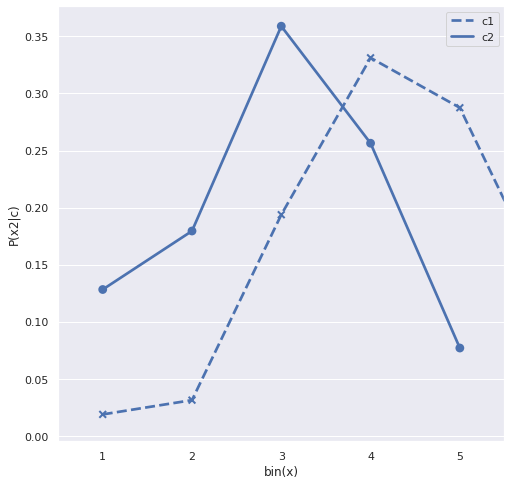

In [101]:
# plotting likelihood for x2
y2_c1 = np.array(count_unique_x2_c1)/len(x2_c1)
sns.pointplot(list(unique_x2_c1),y2_c1, linestyles="--",markers =['x'] )
y2_c2 = np.array(count_unique_x2_c2)/len(x2_c2)
sns.pointplot(list(unique_x2_c2),y2_c2,linestyles='-',markers=['o'])
plt.legend(labels = ['c1','c2'])
plt.xlabel("bin(x)")
plt.ylabel("P(x2|c)")
plt.show()

In [102]:
count_unique_x1_total

[64, 37, 6, 17, 52, 15, 5, 3]

In [103]:
prob_x1 = np.array(count_unique_x1_total)/len(x1_total)

In [104]:
prob_x1

array([0.32160804, 0.18592965, 0.03015075, 0.08542714, 0.26130653,
       0.07537688, 0.02512563, 0.01507538])

In [105]:
unique_x1_total

dict_keys([5, 4, 8, 7, 6, 3, 2, 1])

In [106]:
unique_x1_c1

dict_keys([5, 4, 8, 7, 6, 3])

In [107]:
y1_c1

array([0.35625, 0.15625, 0.0375 , 0.10625, 0.325  , 0.01875])

In [108]:
unique_x1_c2

dict_keys([4, 3, 5, 2, 1])

In [109]:
y1_c2

array([0.30769231, 0.30769231, 0.17948718, 0.12820513, 0.07692308])

In [110]:
counts_x1 = result["x1_bins"].value_counts()
counts_x1

5    64
6    52
4    37
7    17
3    15
8     6
2     5
1     3
Name: x1_bins, dtype: int64

In [111]:
# P(c1|x1) = p(x1|c1)*p(c1)/ p(x1)
# P(c2|x1) = p(x1|c2)*p(c2)/ p(x1)
prob_c1 
prob_c2
y1_c1 
y1_c2
prob_c1_x1 = []
i=0
for x in (unique_x1_c1):
  numerator = y1_c1[i] * prob_c1
  if( x in list(unique_x1_c2)):
     ind_x1_c2 = list(unique_x1_c2).index(x)
     denominator = y1_c1[i] *prob_c1 + y1_c2[ind_x1_c2]* prob_c2
     prob_c1_x1.append(numerator/denominator)
  else:
     denominator = y1_c1[i] *prob_c1 
     prob_c1_x1.append(numerator/denominator)
  i = i+1

prob_c2_x1 = []
i=0
for x in (unique_x1_c2):
  numerator = y1_c2[i] * prob_c2
  if( x in list(unique_x1_c1)):
     ind_x1_c1= list(unique_x1_c1).index(x)
     denominator = y1_c2[i] *prob_c2 + y1_c1[ind_x1_c1]* prob_c1
     prob_c2_x1.append(numerator/denominator)
  else:
     denominator = y1_c2[i] *prob_c2 
     prob_c2_x1.append(numerator/denominator)
  i = i+1


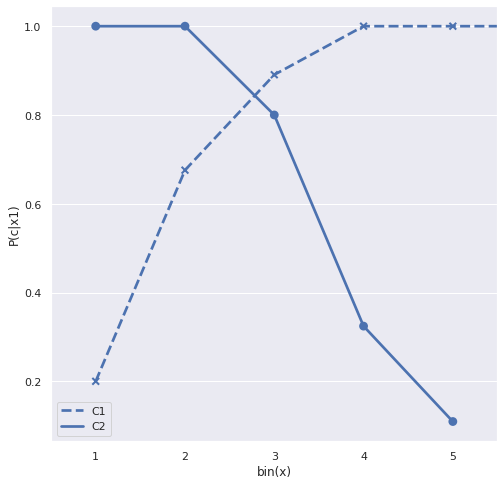

In [112]:
sns.pointplot(list(unique_x1_c1), prob_c1_x1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_x1_c2), prob_c2_x1 ,linestyles='-',markers=['o'])
plt.xlabel("bin(x)")
plt.ylabel("P(c|x1)")
plt.legend(labels = ['C1','C2'])
plt.show()



In [113]:
# P(c1|x2) = p(x2|c1)*p(c1)/ p(x2)
# P(c2|x2) = p(x2|c2)*p(c2)/ p(x2)

prob_c1 
prob_c2
y2_c1 
y2_c2
prob_c1_x2 = []
i=0
for x in (unique_x2_c1):
  numerator = y2_c1[i] * prob_c1
  if( x in list(unique_x2_c2)):
     ind_x2_c2 = list(unique_x2_c2).index(x)
     denominator = y2_c1[i] *prob_c1 + y2_c2[ind_x2_c2]* prob_c2
     prob_c1_x2.append(numerator/denominator)
  else:
     denominator = y2_c1[i] *prob_c1 
     prob_c1_x2.append(numerator/denominator)
  i = i+1

prob_c2_x2 = []
i=0
for x in (unique_x2_c2):
  numerator = y2_c2[i] * prob_c2
  if( x in list(unique_x2_c1)):
     ind_x2_c1= list(unique_x2_c1).index(x)
     denominator = y2_c2[i] *prob_c2 + y2_c1[ind_x2_c1]* prob_c1
     prob_c2_x2.append(numerator/denominator)
  else:
     denominator = y2_c2[i] *prob_c2 
     prob_c2_x2.append(numerator/denominator)
  i = i+1


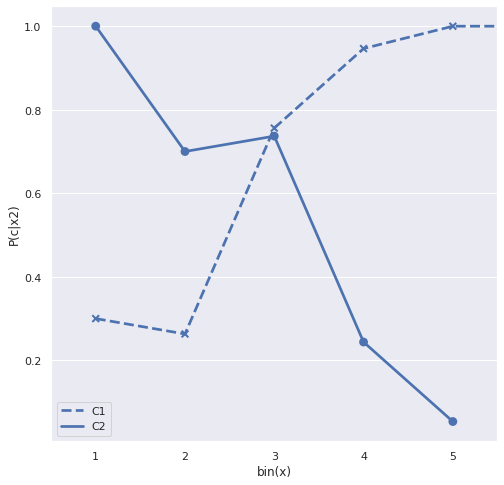

In [114]:
sns.pointplot(list(unique_x2_c1), prob_c1_x2, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_x2_c2), prob_c2_x2 ,linestyles='-',markers=['o'])
plt.xlabel("bin(x)")
plt.ylabel("P(c|x2)")
plt.legend(labels = ['C1','C2'])
plt.show()

# In the report please explain the plots that you are getting clearly explaining the reason .